# Resizing collected images to 200*200

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
width = 200
height = 200
dim = (width, height)

path="C:/IUBH/Books/Master_Thesis/ThesisProject/temp/"
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    h,w,c=pic.shape
    image_name=img.split(".")[0]
    rgb_image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    
    # resize image
    resized = cv2.resize(rgb_image, dim, interpolation = cv2.INTER_AREA)
    image = tf.expand_dims(resized, 0)
    plt.imsave(image_name +".jpg",resized)
   

# Create two folders for holding test & train digits image samples

In [14]:
#Create our dataset folders

import os

def makedir(directory):
    """Creates a new directory if it does not exist"""
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None, 0
    
for i in range(0,10):
    directory_name = "./credit_card/train/"+str(i)
    print(directory_name)
    makedir(directory_name) 

for i in range(0,10):
    directory_name = "./credit_card/test/"+str(i)
    print(directory_name)
    makedir(directory_name)

./credit_card/train/0
./credit_card/train/1
./credit_card/train/2
./credit_card/train/3
./credit_card/train/4
./credit_card/train/5
./credit_card/train/6
./credit_card/train/7
./credit_card/train/8
./credit_card/train/9
./credit_card/test/0
./credit_card/test/1
./credit_card/test/2
./credit_card/test/3
./credit_card/test/4
./credit_card/test/5
./credit_card/test/6
./credit_card/test/7
./credit_card/test/8
./credit_card/test/9


# Image Augmentation Functions

In [1]:
import cv2
import numpy as np 
import random
import cv2
from scipy.ndimage import convolve

def DigitAugmentation(frame, dim = 32):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
    if(random_num % 3 == 0):
        frame = pixelate(frame)
    if(random_num % 2 == 0):
        frame = stretch(frame)
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)

    return frame 

def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0,2) == 0:
        frame = cv2.resize(image, (32, ran+32), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+32)-int(ran/2), 0:32]
    else:
        frame = cv2.resize(image, (ran+32, 32), interpolation = cv2.INTER_AREA)
        return frame[0:32, int(ran/2):int(ran+32)-int(ran/2)]
    
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

## Creating our Training Data (2000 variations of first font type)

In [26]:
# Creating 2000 Images for each digit in creditcard_digits1 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits1", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Training Data (2000 variations of second font type)

In [27]:
# Creating 2000 Images for each digit in creditcard_digits2 - TRAINING DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)
        #cv2.imshow("otsu", roi_otsu)
        #print("-")
        #cv2.waitKey(0)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Training Data (2000 variations of third font type)

In [84]:
# Creating 2000 Images for each digit in creditcard_digits3 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits3.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits3", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(8, 2), (62, 82)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if 0<i<5:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58
    elif i==5:
        top_left_x = top_left_x + 66
        bottom_right_x = bottom_right_x + 66
    elif i>5:    
        top_left_x = top_left_x + 55
        bottom_right_x = bottom_right_x + 55

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_3_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Training Data (2000 variations of forth font type)

In [88]:
# Creating 2000 Images for each digit in creditcard_digits4 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits4.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits4", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(12, 2), (66, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 57
        bottom_right_x = bottom_right_x + 57


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_4_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Training Data (2000 variations of fifth font type)

In [94]:
# Creating 2000 Images for each digit in creditcard_digits5 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits5.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits5", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(4, 2), (64, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_5_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Test Data (2000 variations of first font type)

In [3]:
# Creating 2000 Images for each digit in creditcard_digits1 - TEST DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits1", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Test Data (2000 variations of second font type)

In [4]:
# Creating 2000 Images for each digit in creditcard_digits2 - TEST DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)
        #cv2.imshow("otsu", roi_otsu)
        #print("-")
        #cv2.waitKey(0)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Test Data (2000 variations of third font type)

In [6]:
# Creating 2000 Images for each digit in creditcard_digits3 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits3.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits3", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(8, 2), (62, 82)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if 0<i<5:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58
    elif i==5:
        top_left_x = top_left_x + 66
        bottom_right_x = bottom_right_x + 66
    elif i>5:    
        top_left_x = top_left_x + 55
        bottom_right_x = bottom_right_x + 55

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_3_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Test Data (2000 variations of forth font type)

In [7]:
# Creating 2000 Images for each digit in creditcard_digits4 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits4.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits4", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(12, 2), (66, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 57
        bottom_right_x = bottom_right_x + 57


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_4_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating our Test Data (2000 variations of fifth font type)

In [8]:
# Creating 2000 Images for each digit in creditcard_digits5 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits5.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits5", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(4, 2), (64, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_5_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


# Creating the Classifier

In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from roboflow import Roboflow
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

input_shape = (32, 32, 3)
img_width = 32
img_height = 32
num_classes = 10
nb_train_samples = 10000
nb_validation_samples = 10000
rf = Roboflow(api_key="bLeDIGed220IyKA1cJKs")
project = rf.workspace().project("creditcard_number_detection")
batch_size = 16
epochs = 1

train_data_dir = './credit_card/train'
validation_data_dir = './credit_card/test'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 10,           # randomly applies rotations
      width_shift_range = 0.25,       # randomly applies width shifting
      height_shift_range = 0.25,      # randomly applies height shifting
      shear_range=0.5,
      zoom_range=0.5,
      horizontal_flip = False,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    

## Creating out Model based on the LeNet CNN Architecture

In [4]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 20)        1520      
                                                                 
 activation (Activation)     (None, 32, 32, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                    

## Training the Model

In [5]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("/home/deeplearningcv/DeepLearningCV/Trained Models/creditcard.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 100000
nb_validation_samples = 100000
epochs = 5
batch_size = 64

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save("/home/deeplearningcv/DeepLearningCV/Trained Models/Digits_Detection.h5")

C:\Users\Hamid\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\Users\Hamid\AppData\Local\Temp\ipykernel_8312\1620744920.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
1562/1562 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.8337
Epoch 1: val_loss improved from inf to 0.01867, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\creditcard.h5
1562/1562 [==============================] - 197s 125ms/step - loss: 0.4941 - accuracy: 0.8337 - val_loss: 0.0187 - val_accuracy: 0.9926
Epoch 2/5
1562/1562 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9374
Epoch 2: val_loss improved from 0.01867 to 0.00381, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\creditcard.h5
1562/1562 [==============================] - 210s 134ms/step - loss: 0.1877 - accuracy: 0.9374 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 3/5
1562/1562 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9497
Epoch 3: val_loss did not improve from 0.00381
1562/1562 [==============================] - 171s 109ms/step - loss: 0.1558 - accuracy: 0.9497 - val_loss: 0.0758 - val_accura

## Display model learning rate

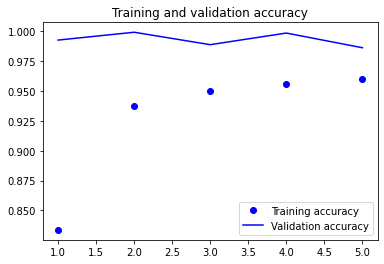

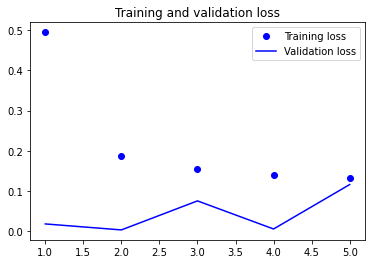

In [6]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Loading the trained model
### Predict Region of Interest by the model

In [33]:
from keras.models import load_model
import keras

classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/Digits_Detection.h5')
model = project.version(4).model
# infer on a local image
ROI=model.predict("test2.jpg", confidence=40, overlap=30)
print(ROI)

{
  "x": 102.0,
  "y": 102.0,
  "width": 168.0,
  "height": 28.0,
  "confidence": 0.8386157751083374,
  "class": "Digits",
  "image_path": "test2.jpg",
  "prediction_type": "ObjectDetectionModel"
}




# Extract the Region of Interest (ROI)

In [43]:
import cv2
x,y,w,h=ROI[0]['x'],ROI[0]['y'],ROI[0]['width'],ROI[0]['height']
w=int((w//2) +1)
h= int((h//2) +1)
y= int(y)
x=int(x)
image = cv2.imread('test2.jpg')
image=image[y-h:y+h,x-w:x+w]

cv2.imwrite("ROI.jpg",image)

True

# Image procssing functions

In [ ]:
import tensorflow 
import keras  
import os
import cv2
import glob
import skimage
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
image = cv2.imread('ROI.jpg')
gray_image = skimage.color.rgb2gray(image)
#plt.imshow(gray_image, cmap = 'gray')

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

#img=erosion
kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(blurred_image,kernel,iterations = 1)
plt.imshow(erosion, interpolation='nearest')

# perform automatic thresholding
t = skimage.filters.threshold_otsu(binary_mask)
binary_mask = erosion < t

imgPath=binary_mask
colorSpaceReduction=4
color_reduced_img =cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE) // colorSpaceReduction * colorSpaceReduction + colorSpaceReduction // 2
#cv2.imshow("color reduced",color_reduced_img)
file_name = 'processed_ROI'+'.jpg'
cv2.imwrite(file_name, color_reduced_img)

# examine the processed ROI to recignize credit card number

In [31]:
import tensorflow as tf
import cv2
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 100:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
#img=binary_mask[1]
img = cv2.imread('processed_ROI.jpg')
orig_img = cv2.imread('Untitled.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", img)
cv2.waitKey(0)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow("blurred", blurred)
cv2.waitKey(0)

#edged = cv2.Canny(blurred, 240, 250)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
ret, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] 
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c) 
    #print(x, y, w, h)
    if w >= 1 and h >= 16 and cv2.contourArea(c) < 8000:
        roi = blurred[y:y + h, x:x + w]
        #ret, roi = cv2.threshold(roi, 20, 255,cv2.THRESH_BINARY_INV)
        #cv2.imshow("ROI1", roi)
        roi_otsu = pre_process(roi, True)
        #cv2.imshow("ROI2", roi_otsu)
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = tf.keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        #label = str(classifier.predict_classes(image, batch_size = 10))[1]
        predict_x=classifier.predict(image, batch_size = 10)[0]
        #predict_x=model.predict(image, batch_size = 10)[0]
        classes_x=np.argmax(predict_x,axis=0)
        label=str(classes_x)
        #print(label)
        full_number.append(label)
        (x, y, w, h) = (x+(3*19), y+(3*88), w, h)
        # resize image
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(orig_img, label, (x , y), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", orig_img)
        cv2.waitKey(0) 
        #HERSHEY_COMPLEX
cv2.destroyAllWindows()

card_number=""
for i in range(16):
    card_number=card_number+str(full_number[i])
    
print(card_number)

1/1 [==============================] - 0s 25ms/step
6104337870668645


In [23]:
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('Founded contours', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

(0.0, 1.0)

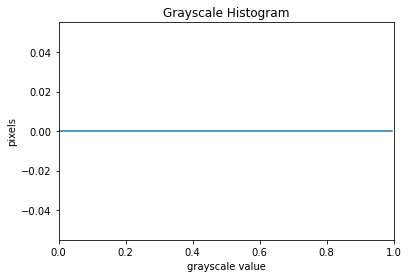

In [26]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(color_reduced_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

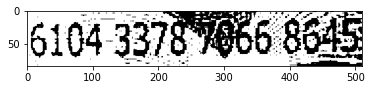

In [68]:
# create a mask based on the threshold
t = 0.6
binary_mask = image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [17]:
#matplotlib.image.imsave('binary_mask.jpeg', binary_mask)
plt.imsave('binary_mask.jpeg', binary_mask)

In [19]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(binary_mask)
print("Found automatic threshold t = {}.".format(t))


Found automatic threshold t = 0.001953125.


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
